## 4. Plot the Climatology

### Loading the data

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

from smadi.climatology import Climatology
from smadi.data_reader import read_grid_point
from smadi.plot import plot_ts

plt.style.use("ggplot")
# Set display options
pd.set_option("display.max_columns", 8)  # Limit the number of columns displayed
pd.set_option("display.precision", 2)  # Set precision to 2 decimal places

# Define the path to the ASCAT data
data_path = "/home/m294/ascat_dataset"

# Example: A grid point in Morocco
lon = -7.382
lat = 33.348
gpid = 3611180

# Define the location of the observation point
loc = (lon, lat)

# Extract ASCAT soil moisture time series for the given location
data = read_grid_point(
    loc=loc, ascat_sm_path=data_path, read_bulk=False, era5_land_path=None
)  # Provide the path to the ERA5-Land data if you want mask snow
# and frozen soil conditions. For more information about
# the dataset see ERA5-Land data documentation and to download
# use the CDS API or https://ecmwf-models.readthedocs.io/en/latest/

# Get the ASCAT soil moisture time series
ascat_ts = data.get("ascat_ts")


# Display the first few rows of the time series data
ascat_ts.head()

Reading ASCAT soil moisture: /home/m294/ascat_dataset
ASCAT GPI: 3611180 - distance:   23.713 m


,sm,sm_noise,as_des_pass,ssf,...,sigma40,sigma40_noise,num_sigma,sm_valid
2007-01-01 21:02:04.161,34.86,3.24,0,0,...,-12.27,0.19,3,True
2007-01-02 11:03:22.807,23.16,3.27,1,0,...,-13.05,0.19,3,True
2007-01-03 10:42:47.739,33.05,3.23,1,0,...,-12.39,0.19,3,True
2007-01-03 22:00:39.007,25.60,3.24,0,0,...,-12.88,0.19,3,True
2007-01-05 10:01:27.519,28.73,3.24,1,0,...,-12.67,0.19,3,True


#### Plot the time series data

In [11]:
# Initialize Climatology object
clim = Climatology(
    df=ascat_ts,
    variable="sm",
    time_step="week",
    fillna=True,
    fillna_window_size=3,
    smoothing=True,
    smooth_window_size=31,
    normal_metrics=["mean", "median", "min", "max", "std"],
)

# Compute normals
clim_df = clim.compute_normals()
clim_df

,sm-mean,norm-mean,norm-median,norm-min,norm-max,norm-std
2007-01-01,33.29,56.55,51.97,33.29,75.79,13.60
2007-01-08,30.54,55.98,52.82,30.54,77.77,14.58
2007-01-15,34.77,56.58,57.21,32.46,79.92,14.96
2007-01-22,36.23,55.30,56.97,28.86,79.00,15.02
2007-01-29,36.65,54.32,54.77,31.44,78.50,14.62
...,...,...,...,...,...,...
2022-11-21,49.86,55.10,53.95,37.34,75.00,11.74
2022-11-28,63.00,58.17,59.25,36.70,74.45,11.60
2022-12-05,69.93,61.46,61.16,36.71,78.51,12.32
2022-12-12,73.97,61.43,59.37,35.26,83.27,12.69


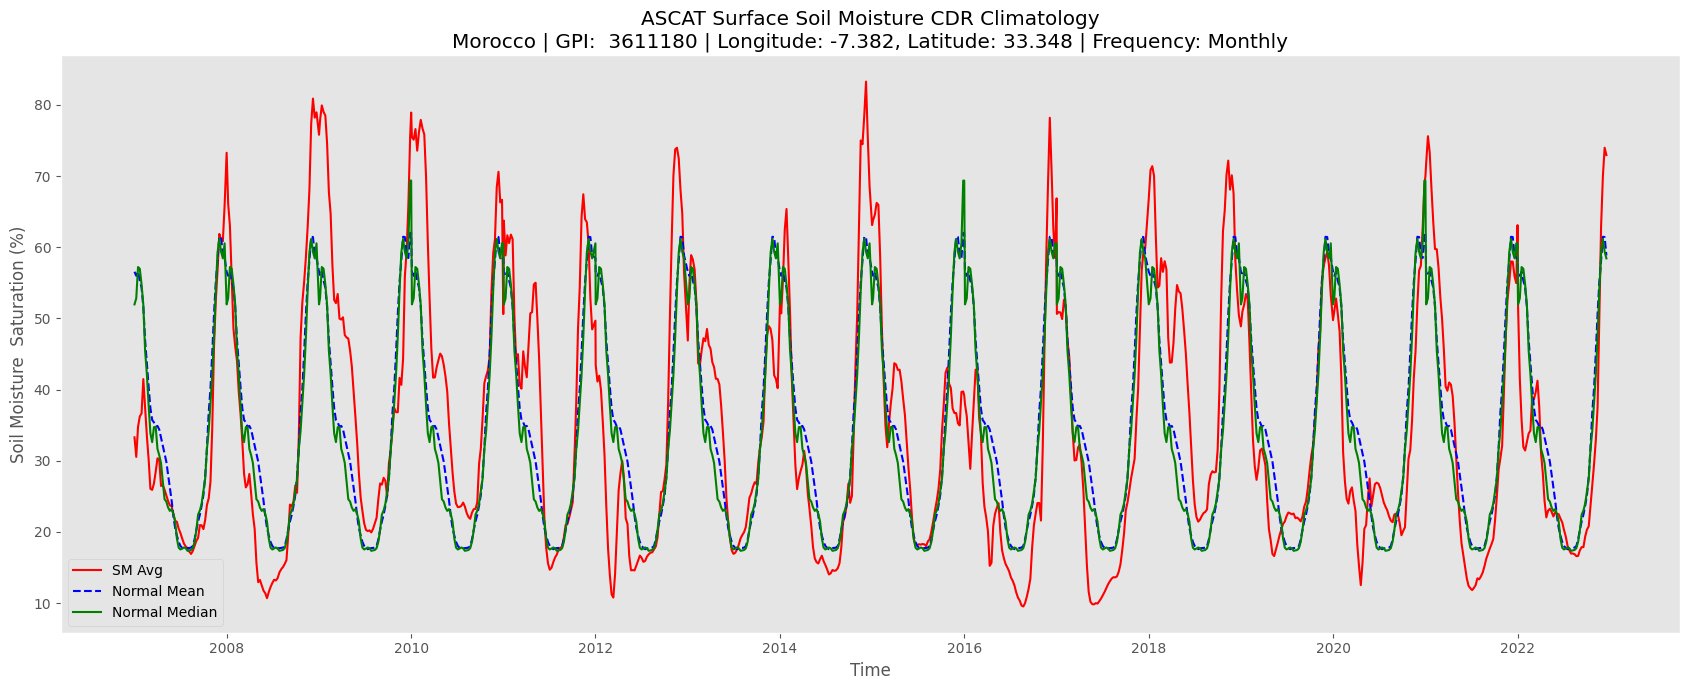

In [12]:
# Set the plot options for each column
colms = {
    "sm-mean": {"color": "red", "linestyle": "-", "linewidth": 1.5, "label": "SM Avg"},
    "norm-mean": {
        "color": "blue",
        "linestyle": "--",
        "linewidth": 1.5,
        "label": "Normal Mean",
    },
    "norm-median": {"color": "green", "linewidth": 1.5, "label": "Normal Median"},
}

plot_ts(
    clim_df,
    clim_df.index,
    colmns_kwargs=colms,
    title=f"ASCAT Surface Soil Moisture CDR Climatology\nMorocco | GPI:  {gpid} | Longitude: {lon}, Latitude: {lat} | Frequency: Monthly",
    figsize=(17, 7),
    xlabel="Time",
    ylabel="Soil Moisture  Saturation (%)",
    legend=True,
    grid=False,
)

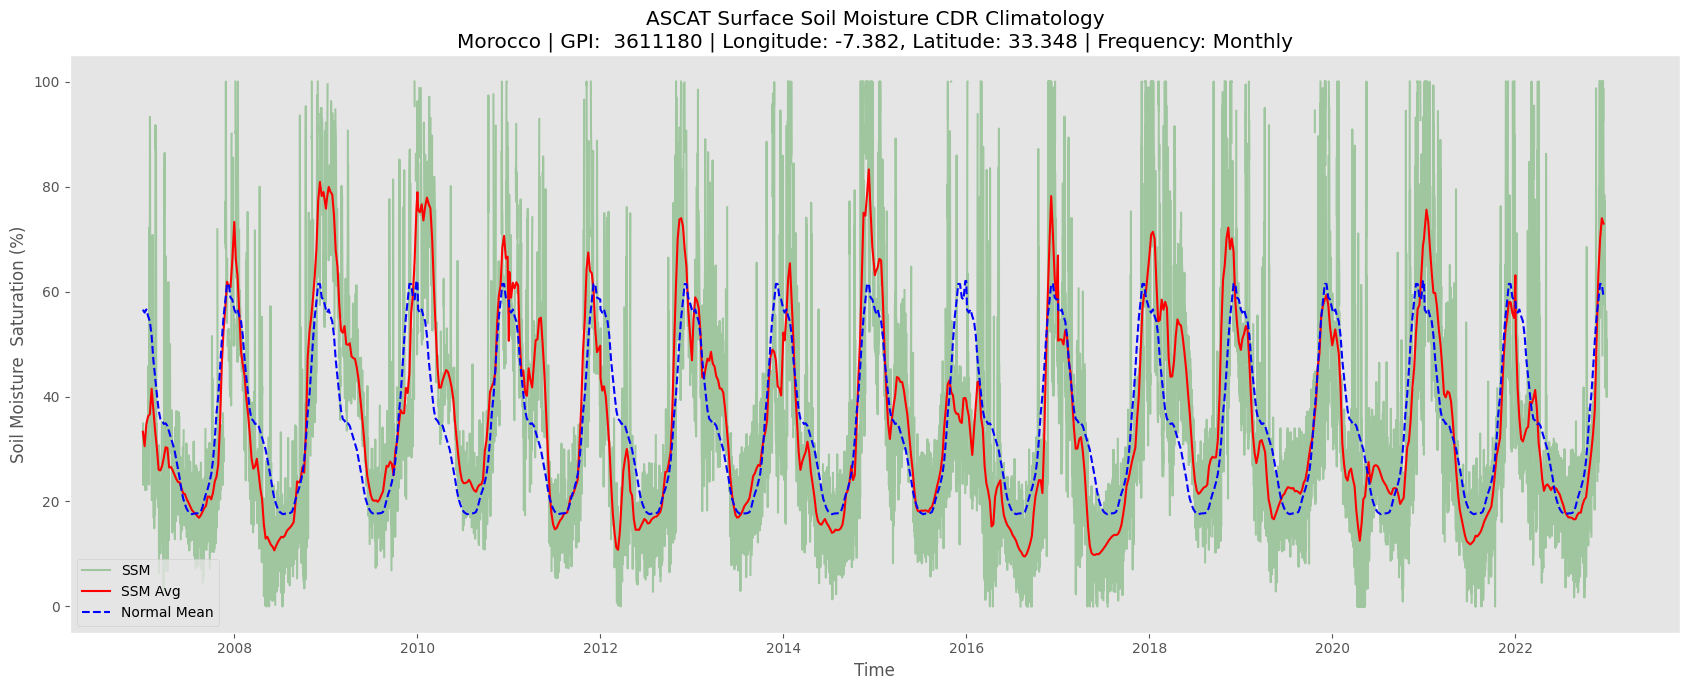

In [13]:
# Set the plot options for each metric
colms = {
    "sm-mean": {"color": "red", "linestyle": "-", "linewidth": 1.5, "label": "SSM Avg"},
    "norm-mean": {
        "color": "blue",
        "linestyle": "--",
        "linewidth": 1.5,
        "label": "Normal Mean",
    },
}

# To plot the raw data, set plot_raw=True and provide the raw_kwargs for customization
plot_ts(
    clim_df,
    clim_df.index,
    colmns_kwargs=colms,
    title=f"ASCAT Surface Soil Moisture CDR Climatology\nMorocco | GPI:  {gpid} | Longitude: {lon}, Latitude: {lat} | Frequency: Monthly",
    figsize=(17, 7),
    xlabel="Time",
    ylabel="Soil Moisture  Saturation (%)",
    plot_raw=True,
    raw_df= ascat_ts,
    raw_var="sm",
    raw_kwargs={"color": "green",  "label": "SSM", "alpha": 0.3},
    legend=True,
    grid=False,
)